# Importing the Data Set

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd

df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t', quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


# Creating Bag of Words model

In [2]:
#Importing the libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
nltk.download('stopwords')

#Creating Corpus
corpus = [] # to collect all the refined reviews
remove_set = ['not', 'is','but', 'no', 'didn', 'doesn', 'won', 'she', 'wasn'] #to remove the words from stopwords

#Getting all stop words
all_stopwords = stopwords.words('english')

#Removing required words from stopwords
for necessary_word in remove_set:
    all_stopwords.remove(necessary_word)

for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ',df['Review'][i]) # substituing all the none characters by space
    review = review.lower() # converting all the revies in to lower case
    review = review.split() # converting the senetence into a list of words
    #Stemming variables
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    # to convert the list of words into sentence we use the join function
    review = ' '.join(review)
    corpus.append(review)

# Creating the bag of words model
cv = CountVectorizer(max_features = None)
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sharath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# SVM Model

Accuracy: 0.9
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.84      0.95      0.89        22

    accuracy                           0.90        50
   macro avg       0.90      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50



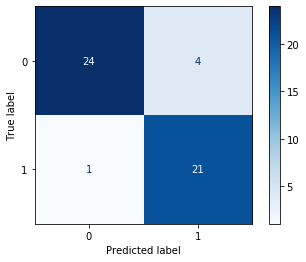

In [3]:
# splitting the x and y into training and test data
from sklearn.model_selection import train_test_split
x_tr1,x_te1,y_tr1,y_te1 = train_test_split(x,y,test_size = 0.05, random_state = 0)

from sklearn.svm import SVC
classifier1 = SVC(kernel='linear', random_state=0)
classifier1.fit(x_tr1,y_tr1)

# prediciting the classification for the test data
y_pred1 = classifier1.predict(x_te1)
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
acc1 = accuracy_score(y_te1,y_pred1)
print("Accuracy:",acc1)

#Confusion Matrix
plot_confusion_matrix(estimator=classifier1, X=x_te1, y_true=y_te1, cmap='Blues')

#Classification Report
print("Classification Report")
print(classification_report(y_te1,y_pred1))

# SVM Model with PCA

In [4]:
#Implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=600)
x_pca = pca.fit_transform(x)
np.set_printoptions(suppress=True)

Accuracy: 0.92
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.91      0.91      0.91        22

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



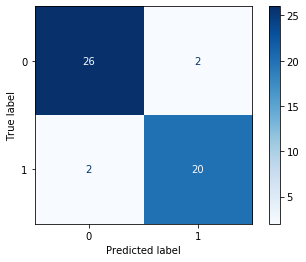

In [5]:
#splitting the data into training set and test set
from sklearn.model_selection import train_test_split
x_tr2,x_te2,y_tr2,y_te2 = train_test_split(x_pca,y,test_size=0.05,random_state=0)

#creating the svm model
from sklearn.svm import SVC
classifier2 = SVC(kernel='linear',random_state=0)

#fitting the model
classifier2.fit(x_tr2,y_tr2)

#predicting the output
y_pred2 = classifier2.predict(x_te2)

#calculating the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
acc2 = accuracy_score(y_te2,y_pred2)
print("Accuracy:",acc2)

#Confusion Matrix
plot_confusion_matrix(estimator=classifier2, X=x_te2, y_true=y_te2, cmap='Blues')

#Classification Report
print("Classification Report")
print(classification_report(y_te2,y_pred2))

# KNN

Accuracy: 0.9
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.94      0.91      0.93        34

    accuracy                           0.90        50
   macro avg       0.88      0.89      0.89        50
weighted avg       0.90      0.90      0.90        50



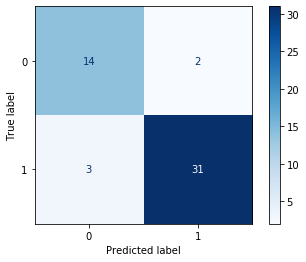

In [6]:
# Feature scalling on X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_knn = sc.fit_transform(x)

#TFID on X
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
x_knn = tfidf_transformer.fit_transform(x_knn)

# splitiing the x and y into training and test set
from sklearn.model_selection import train_test_split
x_tr3,x_te3,y_tr3,y_te3 = train_test_split(x_knn,y,test_size = 0.05,random_state = 3)

# create and train the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier3.fit(x_tr3,y_tr3)

# predicting the values
y_pred3 = classifier3.predict(x_te3)

# accuracy score and the confusuion matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix
print("Accuracy:", accuracy_score(y_te3,y_pred3))
plot_confusion_matrix(estimator=classifier3, X=x_te3, y_true=y_te3, cmap='Blues')

#Classification Report
print("Classification Report")
print(classification_report(y_te3,y_pred3))